In [1]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import random
from sklearn import  model_selection , datasets, linear_model, metrics , ensemble 
from sklearn.model_selection import cross_val_score , learning_curve

In [2]:
segment_directory = "segmentation.csv"

segment = pd.read_csv(segment_directory, header=0 )


In [3]:
segment.head()

,CustomerId,Monetary,Recency,Frequency,factor_1,factor_2,factor_3,factor_4
0,8b4f8c66-7589-4734-8ada-2d42f60540ab,100.40,2019-06-04,6,0.35,0.08,0.609740,0.949383
1,2151b2a2-8867-4986-9e00-449c2b4f89e9,170.00,2019-05-25,4,0.66,0.16,0.942272,0.479846
2,3111db79-6721-4ec0-82b1-30b810649c5e,70.75,2019-05-25,6,0.92,0.20,0.323030,0.007076
3,9cb76426-cc5d-4fa3-88bc-b92314b9f4e8,75.00,2019-03-20,10,0.35,0.78,0.876833,0.088974
4,5d86caeb-2d53-44a7-b379-7f15f06ca821,94.51,2019-04-10,5,0.51,0.44,0.912099,0.206194


In [4]:
del segment['CustomerId']
del segment['Recency']

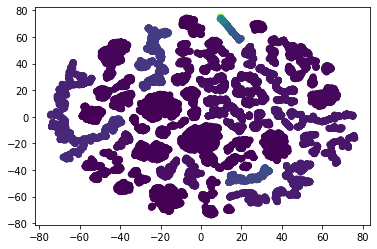

In [5]:
from sklearn.manifold import TSNE

# Определяем модель и скорость обучения
model = TSNE(learning_rate=100)

# Обучаем модель
transformed = model.fit_transform(segment)

# Представляем результат в двумерных координатах
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=segment.Monetary)
plt.show()

In [11]:
np.mean(x_axis)


0.17088631

In [10]:
np.mean(y_axis)

0.17125458

In [6]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(segment[['Monetary' ,'Frequency'
                                       ,'factor_1' ,'factor_2' ,'factor_3' , 'factor_4']].values)
segment['pca-one'] = pca_result[:,0]
segment['pca-two'] = pca_result[:,1] 
segment['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [9.99571126e-01 4.18500676e-04 2.64955726e-06]


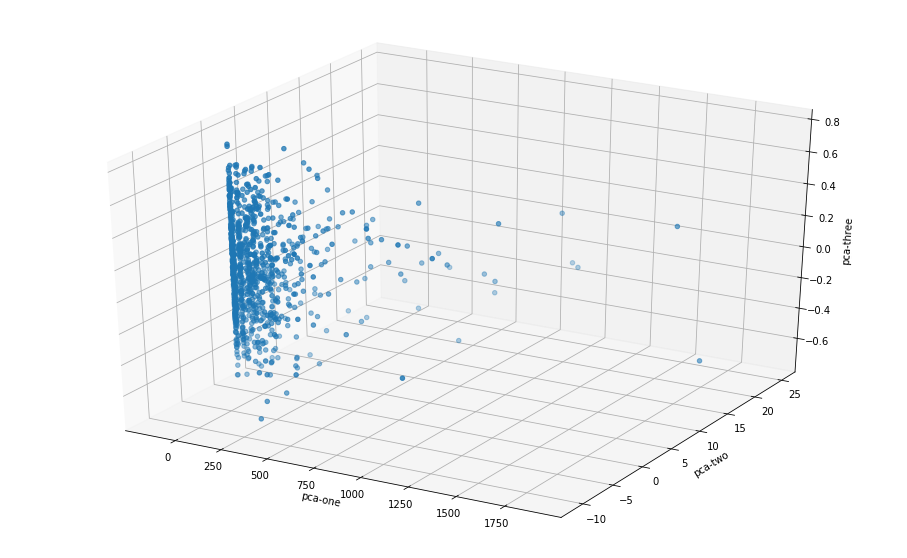

In [7]:
rndperm = list(range(1,1000))

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=segment.loc[rndperm,:]["pca-one"], 
    ys=segment.loc[rndperm,:]["pca-two"], 
    zs=segment.loc[rndperm,:]["pca-three"], 
    
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()